# FRED API Tutorial

This tutorial aims to be a quick guide to get you started using the FRED API integrated into Messari’s python library.

In [1]:
from messari.fred import FRED

API_KEY='your_api_key'
fred = FRED(api_key=API_KEY)

## API Structure

The FRED Python client contains a number of functions that wrap some of FRED’s API endpoints. These include:

Categories

Releases

Series

Sources

Tags

Below are a few examples to showcase the functionality and types of data each function generates.

## Categories

Functions to return information about categories tracked by the FRED

In [2]:
categories = [125, 124]

### get_category

Get a category

In [3]:
categories_df = fred.get_category(categories)
categories_df.head()

,id,name,parent_id
0,125,Trade Balance,13
1,124,Monetary Base,24


### get_category_children

Get the child categories for a specified parent category

In [4]:
children_df = fred.get_category_children([1, 10])
children_df.head()

1                                                            10  \
      id                                      name parent_id       id   
0  32262  Business Cycle Expansions & Contractions         1     12.0   
1  33936                          Business Surveys         1     11.0   
2  32436                              Construction         1  32250.0   
3  33940                                 Emissions         1  33500.0   
4  33955                              Expenditures         1  33001.0   

                                                                \
                                                name parent_id   
0       Current Population Survey (Household Survey)      10.0   
1  Current Employment Statistics (Establishment S...      10.0   
2                                     ADP Employment      10.0   
3                                          Education      10.0   
4                                Income Distribution      10.0   

                                                      
                                               notes  
0  The Current Population Survey (Household Surve...  
1  The establishment survey provides data on empl...  
2                                                NaN  
3                                                NaN  
4                                                NaN

### get_category_related

Get the related categories for a category

In [5]:
categories_related_df = fred.get_category_related('32073')
categories_related_df.head()

32073                       
     id         name parent_id
0   149     Arkansas     27281
1   150     Illinois     27281
2   151      Indiana     27281
3   152     Kentucky     27281
4   153  Mississippi     27281

### get_category_series

Get the series in a category

In [6]:
categories_series_df = fred.get_category_series(categories)
categories_series_df.head()

125                                                     \
        id                                              title   
0  AITGCBN  Advance U.S. International Trade in Goods: Bal...   
1  AITGCBS  Advance U.S. International Trade in Goods: Bal...   
2   BOPBCA          Balance on Current Account (DISCONTINUED)   
3  BOPBCAA          Balance on Current Account (DISCONTINUED)   
4  BOPBCAN          Balance on Current Account (DISCONTINUED)   

                                                                \
  observation_start observation_end  frequency frequency_short   
0        2021-12-01      2021-12-01    Monthly               M   
1        2021-12-01      2021-12-01    Monthly               M   
2        1960-01-01      2014-01-01  Quarterly               Q   
3        1960-01-01      2013-01-01     Annual               A   
4        1960-01-01      2014-01-01  Quarterly               Q   

                                                             \
                 units units_short      seasonal_adjustment   
0  Millions of Dollars   Mil. of $  Not Seasonally Adjusted   
1  Millions of Dollars   Mil. of $      Seasonally Adjusted   
2  Billions of Dollars   Bil. of $      Seasonally Adjusted   
3  Billions of Dollars   Bil. of $  Not Seasonally Adjusted   
4  Billions of Dollars   Bil. of $  Not Seasonally Adjusted   

                             ...                         124                  \
  seasonal_adjustment_short  ...                   frequency frequency_short   
0                       NSA  ...  Biweekly, Ending Wednesday              BW   
1                        SA  ...  Biweekly, Ending Wednesday              BW   
2                        SA  ...                     Monthly               M   
3                       NSA  ...                     Monthly               M   
4                       NSA  ...                     Monthly               M   

                                                                            \
                         units        units_short      seasonal_adjustment   
0          Billions of Dollars          Bil. of $  Not Seasonally Adjusted   
1          Billions of Dollars          Bil. of $  Not Seasonally Adjusted   
2          Billions of Dollars          Bil. of $  Not Seasonally Adjusted   
3          Billions of Dollars          Bil. of $      Seasonally Adjusted   
4  Billions of 1982-84 Dollars  Bil. of 1982-84 $      Seasonally Adjusted   

                                                                \
  seasonal_adjustment_short            last_updated popularity   
0                       NSA  2019-12-19 15:31:02-06        1.0   
1                       NSA  2019-12-19 15:31:02-06        1.0   
2                       NSA  2019-12-13 10:23:01-06       23.0   
3                        SA  2019-12-13 10:23:01-06       43.0   
4                        SA  2020-03-11 13:03:01-05        9.0   

                                                                       
  group_popularity                                              notes  
0              1.0  Updates of this series will be ceased on Decem...  
1              7.0  Updates of this series will be ceased on Decem...  
2             58.0  Updates of this series will be ceased on Decem...  
3             58.0  Updates of this series will be ceased on Decem...  
4              9.0  This series deflates St. Louis Adjusted Moneta...  

[5 rows x 28 columns]

### get_category_tags

Get the tags for a category

In [7]:
categories_tags_df = fred.get_category_tags(categories)
categories_tags_df.head()

125                                        \
                                name group_id                        notes   
0                                bea      src  Bureau of Economic Analysis   
1                             nation     geot                                
2  public domain: citation requested       cc                         None   
3                                usa      geo     United States of America   
4                            balance      gen                                

                                                             124           \
                  created popularity series_count           name group_id   
0  2012-02-27 10:18:19-06         79           46         nation     geot   
1  2012-02-27 10:18:19-06         99           46            usa      geo   
2  2018-12-17 23:33:13-06        100           46  monetary base      gen   
3  2012-02-27 10:18:19-06        100           46   discontinued      gen   
4  2012-02-27 10:18:19-06         47           42            nsa     seas   

                                                                             
                      notes                 created popularity series_count  
0                            2012-02-27 10:18:19-06       99.0         32.0  
1  United States of America  2012-02-27 10:18:19-06      100.0         32.0  
2                            2012-02-27 10:18:19-06       37.0         28.0  
3                            2012-02-27 10:18:19-06       67.0         26.0  
4   Not Seasonally Adjusted  2012-02-27 10:18:19-06      100.0         26.0

### get_category_related_tags

Get the related tags for a category

In [8]:
tag_names = ['services', 'quarterly']
categories_related_tags_df = fred.get_category_related_tags(categories, tag_names)
categories_related_tags_df.head()

125                                        \
                                name group_id                        notes   
0                            balance      gen                                
1                                bea      src  Bureau of Economic Analysis   
2                             nation     geot                                
3  public domain: citation requested       cc                         None   
4                                usa      geo     United States of America   

                                                   
                  created popularity series_count  
0  2012-02-27 10:18:19-06         47           12  
1  2012-02-27 10:18:19-06         79           12  
2  2012-02-27 10:18:19-06         99           12  
3  2018-12-17 23:33:13-06        100           12  
4  2012-02-27 10:18:19-06        100           12

## Releases

Functions to return information about releases tracked by the FRED

In [3]:
# Setup here
releases = [9, 262]

### get_releases

Get all releases of economic data

In [10]:
releases_df = fred.get_releases()
releases_df.head()

,id,name,press_release,link,notes
0,9,Advance Monthly Sales for Retail and Food Serv...,True,http://www.census.gov/retail/,The U.S. Census Bureau conducts the Advance Mo...
1,10,Consumer Price Index,True,http://www.bls.gov/cpi/,NaN
2,11,Employment Cost Index,True,http://www.bls.gov/ncs/ect/,NaN
3,13,G.17 Industrial Production and Capacity Utiliz...,True,http://www.federalreserve.gov/releases/g17/,NaN
4,14,G.19 Consumer Credit,True,http://www.federalreserve.gov/releases/g19/,NaN


### get_releases_dates

Get release dates for all releases of economic data

In [11]:
releases_dates_df = fred.get_releases_dates()
releases_dates_df.head()

,id,realtime_start,realtime_end,name,press_release,link,notes
0,9,2022-02-21,2022-02-21,Advance Monthly Sales for Retail and Food Serv...,True,http://www.census.gov/retail/,The U.S. Census Bureau conducts the Advance Mo...
1,10,2022-02-21,2022-02-21,Consumer Price Index,True,http://www.bls.gov/cpi/,NaN
2,11,2022-02-21,2022-02-21,Employment Cost Index,True,http://www.bls.gov/ncs/ect/,NaN
3,13,2022-02-21,2022-02-21,G.17 Industrial Production and Capacity Utiliz...,True,http://www.federalreserve.gov/releases/g17/,NaN
4,14,2022-02-21,2022-02-21,G.19 Consumer Credit,True,http://www.federalreserve.gov/releases/g19/,NaN


### get_release

Get a release of economic data

In [12]:
release_df = fred.get_release(releases)
release_df.head()

9                                                                     \
   id                                               name press_release   
0   9  Advance Monthly Sales for Retail and Food Serv...          True   

                                  \
                            link   
0  http://www.census.gov/retail/   

                                                      262  \
                                               notes   id   
0  The U.S. Census Bureau conducts the Advance Mo...  262   

                                                       \
                                   name press_release   
0  Failures and Assistance Transactions         False   

                                                      
                                                link  
0  https://banks.data.fdic.gov/explore/failures?a...

### get_release_dates

Get release dates for a release of economic data

In [13]:
release_dates_df = fred.get_release_dates(releases)
release_dates_df.head()

9                      262            
  release_id        date release_id        date
0          9  1966-01-10      262.0  2012-10-09
1          9  1966-02-10      262.0  2013-03-08
2          9  1966-03-10      262.0  2013-03-11
3          9  1966-04-11      262.0  2013-04-15
4          9  1966-05-10      262.0  2013-04-30

### get_release_series

Get the series on a release of economic data

In [4]:
release_series_df = fred.get_release_series(releases)
release_series_df.head()

9                                \
                   id realtime_start realtime_end   
0  MARTSMPCSM44000USN     2022-02-21   2022-02-21   
1  MARTSMPCSM44000USS     2022-02-21   2022-02-21   
2    MARTSMPCSM441USN     2022-02-21   2022-02-21   
3    MARTSMPCSM441USS     2022-02-21   2022-02-21   
4   MARTSMPCSM441XUSN     2022-02-21   2022-02-21   

                                                                        \
                                               title observation_start   
0                 Advance Retail Sales: Retail Trade        1992-02-01   
1                 Advance Retail Sales: Retail Trade        1992-02-01   
2  Advance Retail Sales: Motor Vehicle and Parts ...        1992-02-01   
3  Advance Retail Sales: Motor Vehicle and Parts ...        1992-02-01   
4  Advance Retail Sales: Auto and Other Motor Veh...        1992-02-01   

                                             \
  observation_end frequency frequency_short   
0      2022-01-01   Monthly               M   
1      2022-01-01   Monthly               M   
2      2022-01-01   Monthly               M   
3      2022-01-01   Monthly               M   
4      2022-01-01   Monthly               M   

                                                                       ...  \
                                  units                   units_short  ...   
0  Percent Change from Preceding Period  % Chg. from Preceding Period  ...   
1  Percent Change from Preceding Period  % Chg. from Preceding Period  ...   
2  Percent Change from Preceding Period  % Chg. from Preceding Period  ...   
3  Percent Change from Preceding Period  % Chg. from Preceding Period  ...   
4  Percent Change from Preceding Period  % Chg. from Preceding Period  ...   

        262                                                                  \
  frequency frequency_short                   units             units_short   
0    Annual               A  Number of Institutions  Number of Institutions   
1    Annual               A  Number of Institutions  Number of Institutions   
2    Annual               A  Number of Institutions  Number of Institutions   
3    Annual               A  Number of Institutions  Number of Institutions   
4    Annual               A  Number of Institutions  Number of Institutions   

                                                                              \
       seasonal_adjustment seasonal_adjustment_short            last_updated   
0  Not Seasonally Adjusted                       NSA  2020-02-21 15:43:04-06   
1  Not Seasonally Adjusted                       NSA  2020-02-21 15:43:04-06   
2  Not Seasonally Adjusted                       NSA  2020-11-02 14:30:02-06   
3  Not Seasonally Adjusted                       NSA  2020-02-21 15:43:04-06   
4  Not Seasonally Adjusted                       NSA  2020-05-05 12:04:02-05   

                               \
  popularity group_popularity   
0        1.0              1.0   
1        1.0              1.0   
2        1.0              1.0   
3        1.0              1.0   
4        1.0              1.0   

                                                      
                                               notes  
0  Transaction Types\nInstitutions have been reso...  
1  Charter Class\nThe FDIC assigns classification...  
2  Charter Class\nThe FDIC assigns classification...  
3  Charter Class\nThe FDIC assigns classification...  
4  Charter Class\nThe FDIC assigns classification...  

[5 rows x 32 columns]

### get_release_sources

Get the sources for a release of economic data

In [16]:
release_sources_df = fred.get_release_sources(releases)
release_sources_df.head()

9                                               262  \
   id                name                    link  id   
0  19  U.S. Census Bureau  http://www.census.gov/  69   

                                                                
                                    name                  link  
0  Federal Deposit Insurance Corporation  http://www.fdic.gov/

### get_release_tags

Get the tags for a release

In [17]:
release_tags_df = fred.get_release_tags(releases)
release_tags_df.head()

9                                                               
       name group_id notes                 created popularity series_count
0  services      gen        2012-02-27 10:18:19-06         66           20

### get_release_related_tags

Get the related tags for a release

In [18]:
tag_names = ['sa', 'foreign']
release_related_tags_df = fred.get_release_related_tags('86', tag_names)
release_related_tags_df.head()

86                                                       \
               name group_id               notes                 created   
0        commercial      gen                      2012-02-27 10:18:19-06   
1  commercial paper      gen                      2012-03-19 10:40:59-05   
2               frb      src  Board of Governors  2012-02-27 10:18:19-06   
3            nation     geot                      2012-02-27 10:18:19-06   
4      nonfinancial      gen                      2012-02-27 10:18:19-06   

                           
  popularity series_count  
0         61            2  
1         44            2  
2         80            2  
3         99            2  
4         55            2

## Series

Functions to return information about categories tracked by the FRED

In [19]:
# Setup here
series = ['GNPCA', 'DGS10']

### get_series

Get an economic data series

In [20]:
series_df = fred.get_series(series)
series_df.head()

GNPCA                                                                 \
      id                        title observation_start observation_end   
0  GNPCA  Real Gross National Product        1929-01-01      2020-01-01   

                                                               \
  frequency frequency_short                             units   
0    Annual               A  Billions of Chained 2012 Dollars   

                                                                           \
           units_short      seasonal_adjustment seasonal_adjustment_short   
0  Bil. of Chn. 2012 $  Not Seasonally Adjusted                       NSA   

   ...           DGS10                                                 \
   ... observation_end frequency frequency_short    units units_short   
0  ...      2022-02-17     Daily               D  Percent           %   

                                                                              \
       seasonal_adjustment seasonal_adjustment_short            last_updated   
0  Not Seasonally Adjusted                       NSA  2022-02-18 15:18:05-06   

                                                                 
  popularity                                              notes  
0         93  For further information regarding treasury con...  

[1 rows x 26 columns]

### get_series_categories

Get the categories for an economic data series

In [21]:
series_categories_df = fred.get_series_categories(series)
series_categories_df.head()

GNPCA                    DGS10                                      
     id     name parent_id    id                        name parent_id
0   106  GDP/GNP        18   115  Treasury Constant Maturity        22

### get_series_observations

Get the observations or data values for an economic data series

In [22]:
treasuries = ['DGS1MO','DGS3MO','DGS1','DGS2', 'DGS5', 'DGS7', 'DGS10', 'DGS20', 'DGS30']
series_observations_df = fred.get_series_observations(treasuries)
series_observations_df

,DGS1MO,DGS3MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS20,DGS30
date,,,,,,,,,
1962-01-02,NaN,NaN,3.22,NaN,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,3.24,NaN,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,3.24,NaN,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,3.26,NaN,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,3.31,NaN,3.91,NaN,4.03,4.08,NaN
...,...,...,...,...,...,...,...,...,...
2022-02-11,0.03,0.36,1.07,1.50,1.84,1.92,1.92,2.30,2.24
2022-02-14,0.03,0.43,1.13,1.58,1.90,1.98,1.98,2.35,2.29
2022-02-15,0.02,0.40,1.11,1.58,1.94,2.03,2.05,2.42,2.37


<AxesSubplot:xlabel='date'>

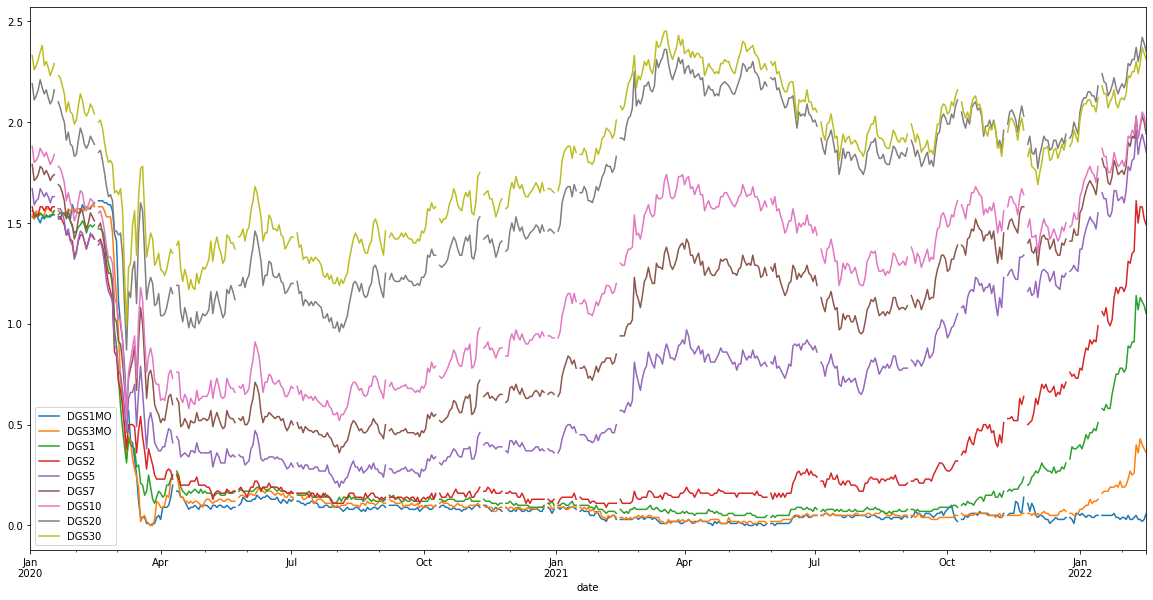

In [24]:
import numpy as np
series_observations_df['2020-01-01':].astype(np.float64).plot(figsize=(20,10))

### get_series_release

Get the release for an economic data series

In [322]:
series_release_df = fred.get_series_release(series)
series_release_df

GNPCA                                        \
     id                    name press_release   
0    53  Gross Domestic Product          True   

                                                     DGS10  \
                                                link    id   
0  https://www.bea.gov/data/gdp/gross-domestic-pr...    18   

                                               \
                           name press_release   
0  H.15 Selected Interest Rates          True   

                                                
                                          link  
0  http://www.federalreserve.gov/releases/h15/

### get_series_tags

Get the tags for an economic data series

In [323]:
series_tags_df = fred.get_series_tags(series)
series_tags_df

GNPCA           \
                                 name group_id   
0                                 nsa     seas   
1                                 usa      geo   
2   public domain: citation requested       cc   
3                              annual     freq   
4                              nation     geot   
5                                 bea      src   
6                                 gdp      gen   
7                                real      gen   
8                                nipa      rls   
9                                 gnp      gen   
10                                NaN      NaN   
11                                NaN      NaN   
12                                NaN      NaN   

                                                                             \
                                   notes                 created popularity   
0                Not Seasonally Adjusted  2012-02-27 10:18:19-06      100.0   
1               United States of America  2012-02-27 10:18:19-06      100.0   
2                                   None  2018-12-17 23:33:13-06      100.0   
3                                         2012-02-27 10:18:19-06       90.0   
4                                         2012-02-27 10:18:19-06       99.0   
5            Bureau of Economic Analysis  2012-02-27 10:18:19-06       79.0   
6                 Gross Domestic Product  2012-02-27 10:18:19-06       82.0   
7                                         2012-02-27 10:18:19-06       75.0   
8   National Income and Product Accounts  2012-08-16 15:21:17-05       71.0   
9                 Gross National Product  2012-02-27 10:18:19-06       38.0   
10                                   NaN                     NaN        NaN   
11                                   NaN                     NaN        NaN   
12                                   NaN                     NaN        NaN   

                                             DGS10           \
   series_count                               name group_id   
0      734842.0                                nsa     seas   
1      652844.0                                usa      geo   
2      607342.0  public domain: citation requested       cc   
3      489004.0                             nation     geot   
4      257446.0                                frb      src   
5       77988.0                               rate      gen   
6       74416.0                           maturity      gen   
7       33712.0                           interest      gen   
8       12780.0                           treasury      gen   
9         272.0                      interest rate      gen   
10          NaN                              daily     freq   
11          NaN                            10-year      gen   
12          NaN                                h15      rls   

                                                                     \
                           notes                 created popularity   
0        Not Seasonally Adjusted  2012-02-27 10:18:19-06        100   
1       United States of America  2012-02-27 10:18:19-06        100   
2                           None  2018-12-17 23:33:13-06        100   
3                                 2012-02-27 10:18:19-06         99   
4             Board of Governors  2012-02-27 10:18:19-06         80   
5                                 2012-02-27 10:18:19-06         87   
6                                 2012-02-27 10:18:19-06         57   
7                                 2012-02-27 10:18:19-06         74   
8                                 2012-02-27 10:18:19-06         61   
9                                 2012-05-29 10:14:19-05         74   
10                                2012-02-27 10:18:19-06         72   
11                                2012-02-27 10:18:19-06         55   
12  H.15 Selected Interest Rates  2012-08-16 15:21:17-05         57   

                 
   series_count  
0        734842  
1        652844  
2        60

### get_series_updates

Get economic data series sorted by when observations were updated on the FRED server

In [324]:
series_updates_df = fred.get_series_updates(start_date='2013-01-01', end_date='2020-06-01')
series_updates_df

""


### get_series_vintagedates

Get the dates in history when a series' data values were revised or new data values were released

In [325]:
series_vintagedates_df = fred.get_series_vintagedates(series)
series_vintagedates_df

,GNPCA,DGS10
0,2013-03-28,2014-04-02
1,2013-07-31,2014-04-03
2,2014-03-27,2014-04-04
3,2014-07-30,2014-04-07
4,2015-03-27,2014-04-08
...,...,...
1509,NaN,2020-05-26
1510,NaN,2020-05-27
1511,NaN,2020-05-28
1512,NaN,2020-05-29


## Sources

Functions to return information about categories tracked by the FRED

In [326]:
# Setup here
sources = [1, 3]

### get_sources

Get all sources of economic data

In [330]:
sources_df = fred.get_sources()
sources_df.head()

,id,name,link,notes
0,1,Board of Governors of the Federal Reserve Syst...,http://www.federalreserve.gov/,NaN
1,3,Federal Reserve Bank of Philadelphia,https://www.philadelphiafed.org/,NaN
2,4,Federal Reserve Bank of St. Louis,http://www.stlouisfed.org/,NaN
3,6,Federal Financial Institutions Examination Cou...,http://www.ffiec.gov/,NaN
4,11,Dow Jones & Company,http://www.dowjones.com,NaN


### get_source

Get a source of economic data

In [331]:
source_df = fred.get_source(sources)
source_df.head()

1                                                     \
  id                                               name   
0  1  Board of Governors of the Federal Reserve Syst...   

                                   3                                        \
                             link id                                  name   
0  http://www.federalreserve.gov/  3  Federal Reserve Bank of Philadelphia   

                                     
                               link  
0  https://www.philadelphiafed.org/

### get_source_releases

Get the releases for a source

In [332]:
source_releases_df = fred.get_source_releases(sources)
source_releases_df.head()

1                                                                   \
   id                                               name press_release   
0  13  G.17 Industrial Production and Capacity Utiliz...          True   
1  14                               G.19 Consumer Credit          True   
2  15                         G.5 Foreign Exchange Rates          True   
3  17                        H.10 Foreign Exchange Rates          True   
4  18                       H.15 Selected Interest Rates          True   

                                                          3  \
                                          link notes     id   
0  http://www.federalreserve.gov/releases/g17/   NaN  109.0   
1  http://www.federalreserve.gov/releases/g19/   NaN  208.0   
2   http://www.federalreserve.gov/releases/g5/   NaN  351.0   
3  http://www.federalreserve.gov/releases/h10/   NaN  352.0   
4  http://www.federalreserve.gov/releases/h15/   NaN    NaN   

                                                           \
                                       name press_release   
0                  State Coincident Indexes          True   
1                     State Leading Indexes          True   
2     Manufacturing Business Outlook Survey          True   
3  Nonmanufacturing Business Outlook Survey          True   
4                                       NaN           NaN   

                                                      \
                                                link   
0  https://www.phil.frb.org/research-and-data/reg...   
1  https://www.philadelphiafed.org/research-and-d...   
2  https://www.philadelphiafed.org/research-and-d...   
3  https://www.philadelphiafed.org/research-and-d...   
4                                                NaN   

                                                      
                                               notes  
0                                                NaN  
1  The leading index for each state predicts the ...  
2  The Manufacturing Business Outlook Survey is a...  
3  The Nonmanufacturing Business Outlook Survey i...  
4                                                NaN

## tags

Functions to return information about categories tracked by the FRED

In [32]:
# Setup here
tags = ['slovenia', 'food', 'oecd']

### get_tags

Get all tags, search for tags, or get tags by name

In [111]:
tags_df = fred.get_tags()
tags_df.head()

,name,group_id,notes,created,popularity,series_count
0,nogales,geo,None,2020-03-26 17:12:41-05,0,38
1,non-oecd,geo,Non-OECD Economies,2013-07-13 16:10:13-05,-11,38
2,norwalk,geo,None,2020-03-26 17:12:41-05,-80,38
3,paragould,geo,None,2020-03-26 17:12:41-05,-67,38
4,passenger fares,gen,,2012-02-27 10:18:19-06,-19,38


### get_related_tags

Get the related tags for one or more tags

In [36]:
related_tags_df = fred.get_related_tags(tags)
related_tags_df.head()

,name,group_id,notes,created,popularity,series_count
0,copyrighted: citation required,cc,None,2018-12-17 23:33:13-06,88,16
1,indexes,gen,,2012-02-27 10:18:19-06,84,16
2,mei,rls,Main Economic Indicators,2012-08-16 15:21:17-05,76,16
3,nation,geot,,2012-02-27 10:18:19-06,99,16
4,nsa,seas,Not Seasonally Adjusted,2012-02-27 10:18:19-06,100,16


### get_tags_series

Get the series matching tags

In [333]:
tags_series_df = fred.get_tags_series(tags)
tags_series_df.head()

,id,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
0,CPGDFD02SIA657N,Consumer Price Index: Total Food Excluding Res...,1996-01-01,2017-01-01,Annual,A,Growth Rate Previous Period,Growth Rate Previous Period,Not Seasonally Adjusted,NSA,2018-03-09 15:10:44-06,0,1,OECD descriptor ID: CPGDFD02\nOECD unit ID: GP...
1,CPGDFD02SIA659N,Consumer Price Index: Total Food Excluding Res...,1996-01-01,2017-01-01,Annual,A,Growth Rate Same Period Previous Year,Growth Rate Same Period Previous Yr.,Not Seasonally Adjusted,NSA,2018-03-09 15:22:46-06,1,1,OECD descriptor ID: CPGDFD02\nOECD unit ID: GY...
2,CPGDFD02SIM657N,Consumer Price Index: Total Food Excluding Res...,1996-01-01,2018-05-01,Monthly,M,Growth Rate Previous Period,Growth Rate Previous Period,Not Seasonally Adjusted,NSA,2018-06-19 14:12:52-05,1,1,OECD descriptor ID: CPGDFD02\nOECD unit ID: GP...
3,CPGDFD02SIM659N,Consumer Price Index: Total Food Excluding Res...,1996-01-01,2018-05-01,Monthly,M,Growth Rate Same Period Previous Year,Growth Rate Same Period Previous Yr.,Not Seasonally Adjusted,NSA,2018-06-19 14:12:52-05,1,1,OECD descriptor ID: CPGDFD02\nOECD unit ID: GY...
4,CPGDFD02SIQ657N,Consumer Price Index: Total Food Excluding Res...,1996-01-01,2018-01-01,Quarterly,Q,Growth Rate Previous Period,Growth Rate Previous Period,Not Seasonally Adjusted,NSA,2018-04-17 10:11:23-05,0,1,OECD descriptor ID: CPGDFD02\nOECD unit ID: GP...
